<a href="https://colab.research.google.com/github/pachterlab/gget_examples/blob/main/gget_alphafold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gget alphafold](https://github.com/pachterlab/gget) demonstration
Predict the 3D structure of a protein from its amino acid sequence using a simplified version of [DeepMind](https://www.deepmind.com/)’s [AlphaFold2](https://github.com/deepmind/alphafold) originally released and benchmarked for [AlphaFold Colab](https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb). To increase speed, set "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU". Also see: [ColabFold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).

Written by Laura Luebbert.
___

Install and import gget:

In [2]:
!pip install -q -U gget 
import gget

     |████████████████████████████████| 2.2 MB 34.4 MB/s 
     |████████████████████████████████| 128 kB 71.9 MB/s 
     |████████████████████████████████| 25.4 MB 33.0 MB/s 


In [3]:
# For pretty plots
%config InlineBackend.figure_format='retina'

Use Miniconda to install OpenMM (to install openmm v7.5.1 on your local machine, run `conda install -c conda-forge openmm=7.5.1` from the command-line):

In [ ]:
import sys
%shell rm -rf /opt/conda
%shell wget -q -P /tmp \
  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh \
    && bash /tmp/Miniconda3-latest-Linux-x86_64.sh -b -p /opt/conda \
    && rm /tmp/Miniconda3-latest-Linux-x86_64.sh
PATH=%env PATH
%env PATH=/opt/conda/bin:{PATH}
%shell conda install -qy -c conda-forge python=3.7 openmm=7.5.1 
# Add to path
sys.path.append('/opt/conda/lib/python3.7/site-packages')

Install third-part dependencies and download AlphaFold model parameters using `gget setup`:

In [5]:
gget.setup("alphafold")

Fri Aug  5 23:48:20 2022 INFO openmm v7.5.1 already installed.
Fri Aug  5 23:48:20 2022 INFO Installing AlphaFold from source (requires pip).
Fri Aug  5 23:49:34 2022 INFO AlphaFold installed succesfully.
Fri Aug  5 23:49:34 2022 INFO Installing pdbfixer from source (requires pip).
Fri Aug  5 23:49:37 2022 INFO pdbfixer installed succesfully.
Fri Aug  5 23:49:37 2022 INFO Downloading AlphaFold model parameters (requires 4.1 GB of storage). This might take a few minutes.
######################################################################## 100.0%
Fri Aug  5 23:50:28 2022 INFO Model parameter download complete.


Predict a protein structure:

In [ ]:
# Show gget alphafold arguments
help(gget.alphafold)

Help on function alphafold in module gget.gget_alphafold:

alphafold(sequence, out='2022_08_05-1455_gget_alphafold_prediction', relax=False, plot=True, show_sidechains=True)
    Predicts the structure of a protein using a slightly simplified version of AlphaFold v2.1.0 (https://doi.org/10.1038/s41586-021-03819-2)
    published in the AlphaFold Colab notebook (https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb).
    
    Args:
      - sequence          Amino acid sequence (str), a list of sequences, or path to a FASTA file.
      - out               Path to folder to save prediction results in (str).
                          Default: "./[date_time]_gget_alphafold_prediction"
      - relax             True/False whether to AMBER relax the best model (default: False).
      - plot              True/False whether to provide a graphical overview of the prediction (default: True).
      - show_sidechains   True/False whether to show side chains i

Predict the structure of CASP14 target [T1024](https://predictioncenter.org/casp14/target.cgi?id=8&view=all):

Fri Aug  5 00:20:09 2022 INFO Validating input sequence(s).
Fri Aug  5 00:20:09 2022 INFO Finding closest source for reference database.


Using the single-chain model.


Jackhmmer search: 100%|██████████| 147/147 [elapsed: 48:48 remaining: 00:00]
Fri Aug  5 01:09:18 2022 INFO 58 unique sequences found in uniref90 for sequence 1.
Fri Aug  5 01:09:18 2022 INFO 110 unique sequences found in smallbfd for sequence 1.
Fri Aug  5 01:09:18 2022 INFO 9 unique sequences found in mgnify for sequence 1.



173 unique sequences found in total for sequence 1



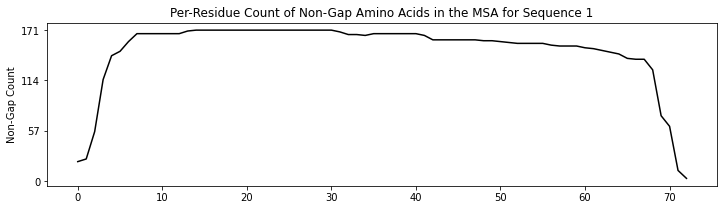

Running model_2_ptm: 100%|██████████| 7/7 [elapsed: 24:47 remaining: 00:00]
Fri Aug  5 01:34:06 2022 INFO Plotting prediction results.


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

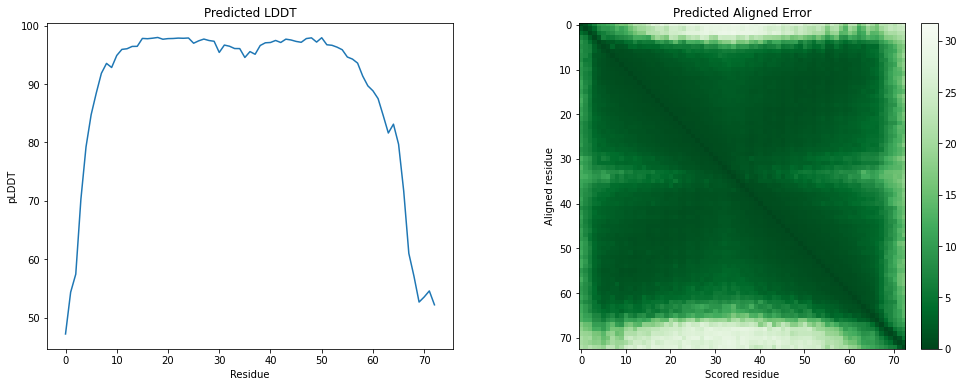

In [ ]:
gget.alphafold("MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH")

Predict the 3D structure of an engineered fluorescent nicotine sensor ([PDB 7S7U](https://www.rcsb.org/structure/7S7U)):

Fri Aug  5 23:50:36 2022 INFO Validating input sequence(s).
Fri Aug  5 23:50:36 2022 INFO Finding closest source for reference database.


Using the single-chain model.


Jackhmmer search: 100%|██████████| 147/147 [elapsed: 1:01:49 remaining: 00:00]
Sat Aug  6 00:52:55 2022 INFO 9957 unique sequences found in uniref90 for sequence 1.
Sat Aug  6 00:52:55 2022 INFO 1738 unique sequences found in smallbfd for sequence 1.
Sat Aug  6 00:52:57 2022 INFO 495 unique sequences found in mgnify for sequence 1.



12040 unique sequences found in total for sequence 1



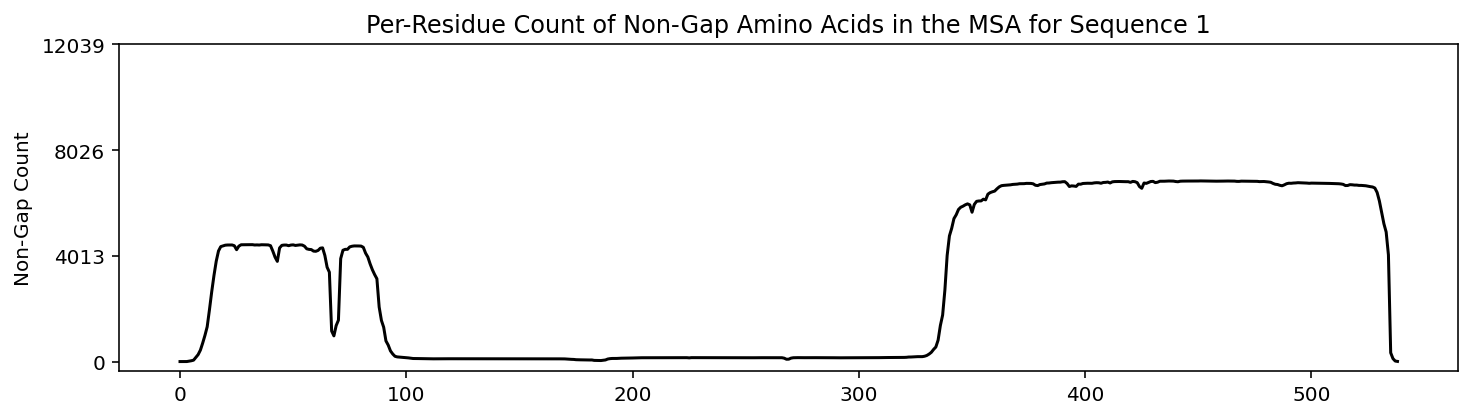

Running model_2_ptm: 100%|██████████| 7/7 [elapsed: 1:05:28 remaining: 00:00]
Sat Aug  6 01:58:30 2022 INFO Plotting prediction results.


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

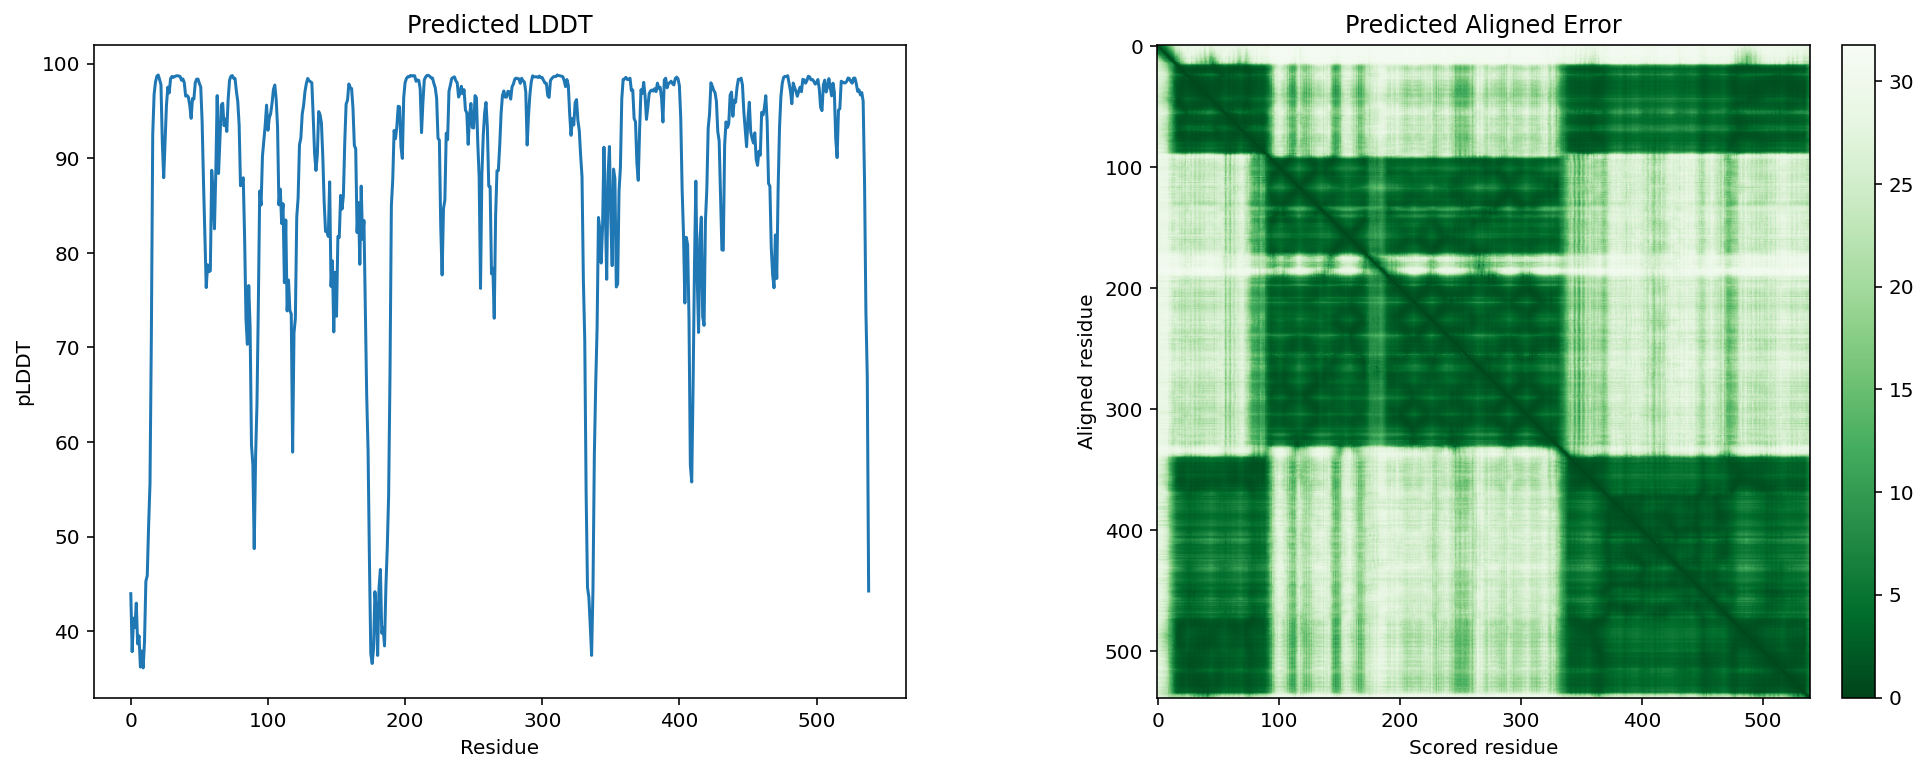

In [6]:
gget.alphafold(
    "MHHHHHHGAQPARSANDTVVVGSINFTEGIIVANMVAEMIEAHTDLKVVRKLNLGGENVNFEAIKRGGANNGIDIYVEYTGHGLVDILGFPEPNVYITADKQKNGIKANFKIRHNMEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSVLSKDPNEKRDHMVLLEFVTAAGITLGMDELYKGGTGGSMSKGEELFTGVVPILVELDGGVNGHKFSVRGEGEGDATNGKLTLKFICTTGKLPVPWPTLVTTLTYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTISFKDDGTYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNFPPPSSTDPEGAYETVKKEYKRKWNIVWLKPLGFNNTYTLTVKDELAKQYNLKTFSDLAKISDKLILGATMFFLEGPDGYPGLQKLYNFKFKHTKSMDMGIRYTAIDNNEVQVIDAWATDGLLVSHKLKILEDDKAFFPPYYAAPIIRQDVLDKHPELKDVLNKLANQISLEEMQKLNYKVDGEGQDPAKVAKEFLKEKGLILQVD",
    show_sidechains=False
    )